In [71]:

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("C:\\Users\\Admin\\Downloads\\advertising.csv")
df



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [72]:


def outlier_removal(df, column_name):
    sorted(column_name)
    Q2 = df[column_name].median()
    Q1 = np.percentile(df[column_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation = 'midpoint')
    iqr = Q3 - Q1
    low = Q1 - 1.5 * iqr
    high = Q3 + 1.5 * iqr
    df.drop(df.index[(df[column_name] > high)],axis=0,inplace=True)
    df.drop(df.index[(df[column_name] < low)],axis=0,inplace=True)
    
    
outlier_removal(df,"Newspaper")
df.describe()

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


<Axes: >

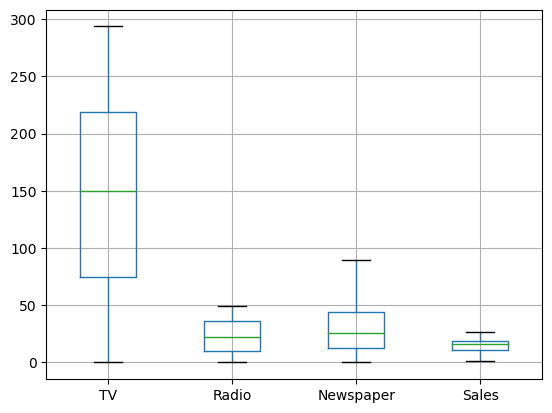

In [73]:
df.boxplot()

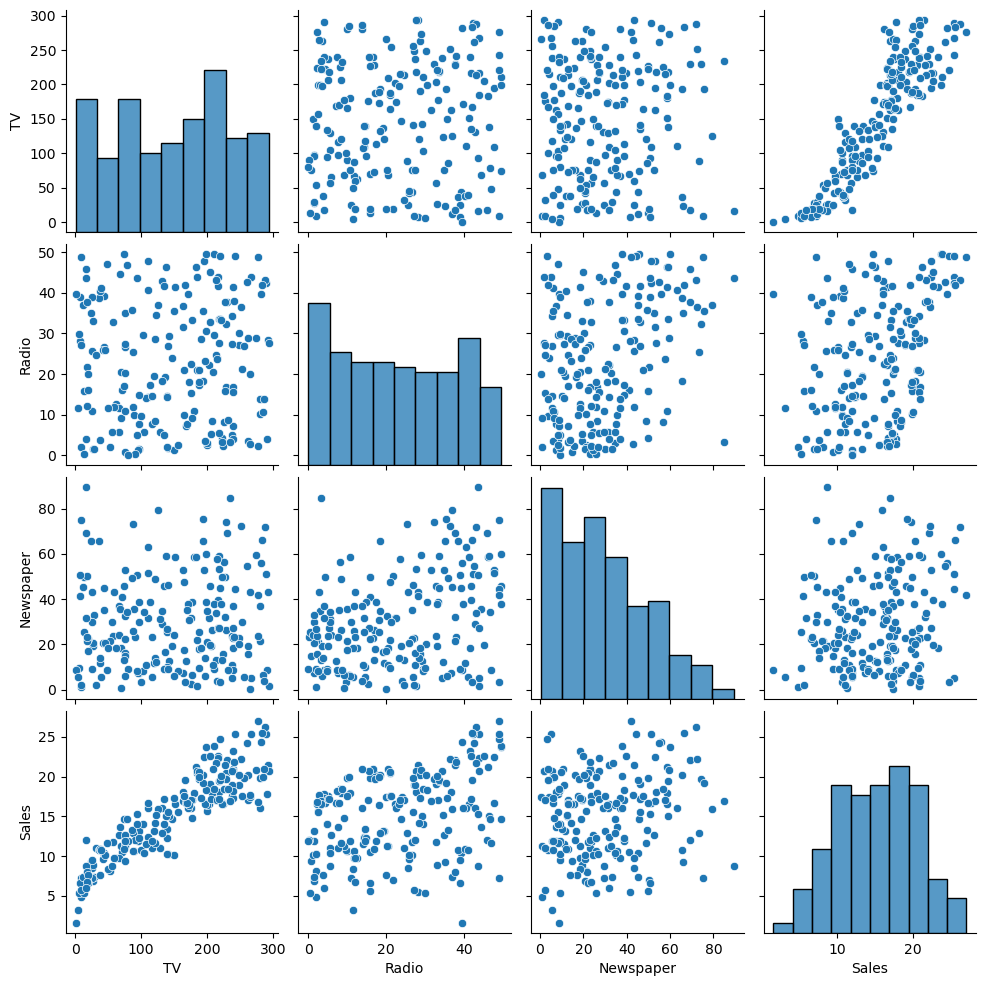

In [74]:
sns.pairplot(df)

<Axes: >

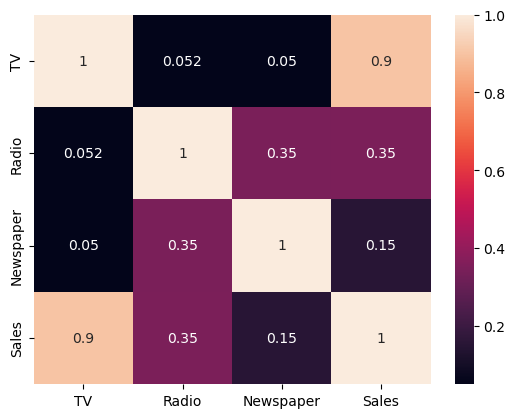

In [75]:
sns.heatmap(df.corr(),annot =True)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['TV']]
y = df[['Sales']]
train_X , test_X, train_y, test_y = train_test_split(X,y,random_state=2)
model = LinearRegression()
model.fit(train_X, train_y)
pred = model.predict(test_X)


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(test_y,pred)
mse = mean_squared_error(test_y, pred)
print(r2, mse)

0.8029290169389363 5.474370987454778


In [78]:
print(model.coef_)
print(model.intercept_)

[[0.05648009]]
[6.75117113]


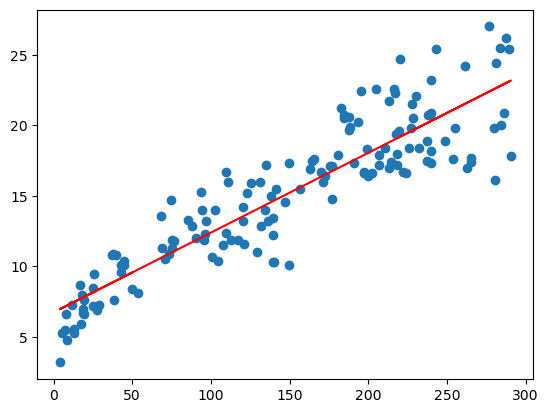

In [79]:
plt.scatter(train_X, train_y)
plt.plot(train_X, model.intercept_ +model.coef_*train_X,'r')

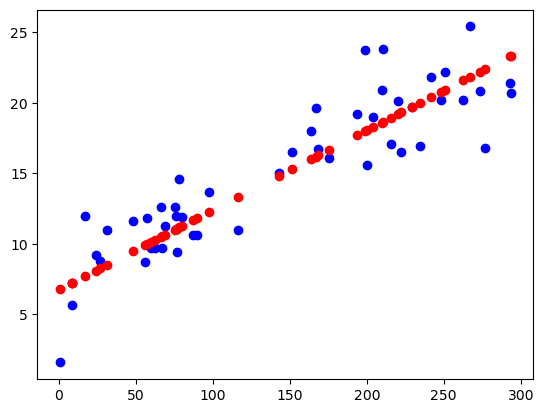

In [80]:
plt.scatter(test_X, test_y, color='blue')
plt.plot(test_X, pred, 'ro')

<Axes: ylabel='Density'>

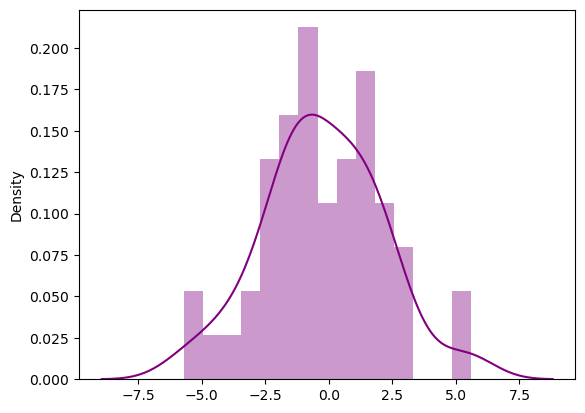

In [88]:
residual = pred - test_y
residual
sns.distplot(residual, color = 'purple', bins = 15)